# Deep Learning Playground

This notebook demonstrates:
1. **MLP** for tabular data
2. **CNN** for image data
3. **Simple RNN**, **LSTM**, and **GRU** for sequence data

Feel free to adjust hyper‑parameters and architectures to deepen your understanding!

In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, tensorflow as tf
from tensorflow.keras import layers, models
print('TensorFlow version:', tf.__version__)

TensorFlow version: 2.18.0


## Part 1 – MLP on Titanic

In [17]:
titanic = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")
titanic = titanic.drop(['Cabin','Ticket','Name','Embarked'], axis=1)
titanic['Age'].fillna(titanic['Age'].median(), inplace=True)
titanic['Sex'] = titanic['Sex'].map({'male':0,'female':1})
titanic.dropna(inplace=True)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X = titanic[['Pclass','Sex','Age','Fare']].values
y = titanic['Survived'].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_50084\1585004622.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['Age'].fillna(titanic['Age'].median(), inplace=True)


In [ ]:
titanic = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")
titanic = titanic.drop(['Cabin','Ticket','Name','Embarked'], axis=1)
titanic['Age'].fillna(titanic['Age'].median(), inplace=True)
titanic['Sex'] = titanic['Sex'].map({'male':0,'female':1})
titanic.dropna(inplace=True)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X = titanic[['Pclass','Sex','Age','Fare']].values
y = titanic['Survived'].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [35]:
mlp = models.Sequential([
    layers.Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dropout(0.3),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])
mlp.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
mlp.summary()

c:\Users\Utilisateur\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_31 (Dense)                │ (None, 32)             │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 705 (2.75 KB)

 Trainable params: 705 (2.75 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# # `tanh` instead of `relu`
# mlp = models.Sequential([layers.Dense(32, activation='tanh', input_shape=(X_train.shape[1],)),
#                           layers.Dense(16, activation='tanh'),
#                           layers.Dense(1, activation='sigmoid')])
# mlp.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# mlp.summary()

c:\Users\Utilisateur\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                │ (None, 32)             │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 705 (2.75 KB)

 Trainable params: 705 (2.75 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# #`leaky_relu` instead of `relu`
# mlp = models.Sequential([layers.Dense(32, activation='leaky_relu', input_shape=(X_train.shape[1],)),
#                           layers.Dense(16, activation='leaky_relu'),
#                           layers.Dense(1, activation='sigmoid')])
# mlp.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# mlp.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_17 (Dense)                │ (None, 32)             │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 705 (2.75 KB)

 Trainable params: 705 (2.75 KB)

 Non-trainable params: 0 (0.00 B)

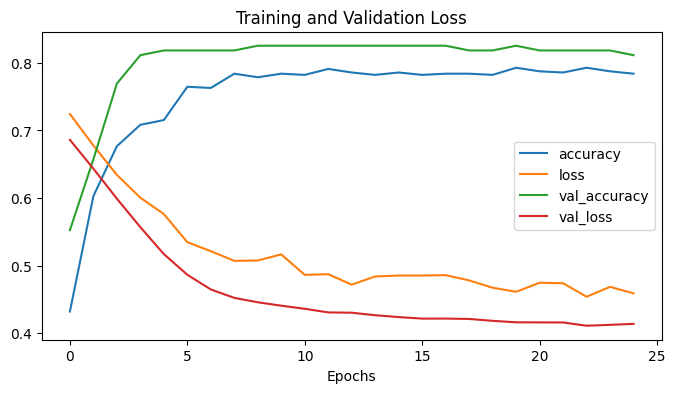

Test accuracy: 0.7877094745635986


In [36]:
# relu
hist = mlp.fit(X_train, y_train, epochs=25, batch_size=32,
                    validation_split=0.2, verbose=0)
pd.DataFrame(hist.history).plot(figsize=(8,4))
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.show()

print('Test accuracy:', mlp.evaluate(X_test, y_test, verbose=0)[1])

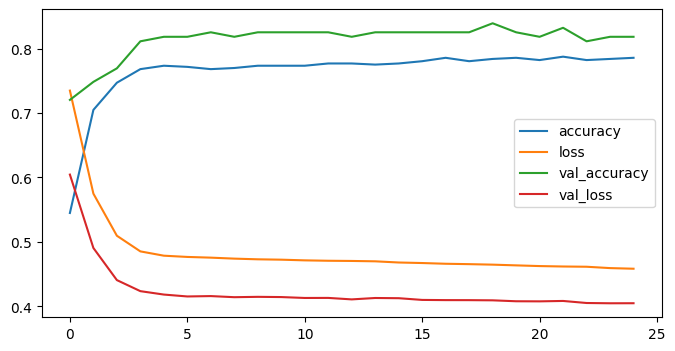

Test accuracy: 0.7988826632499695


In [ ]:
# # tahn instead of relu
# hist = mlp.fit(X_train, y_train, epochs=25, batch_size=32,
#                     validation_split=0.2, verbose=0)
# pd.DataFrame(hist.history).plot(figsize=(8,4)); plt.show()
# print('Test accuracy:', mlp.evaluate(X_test, y_test, verbose=0)[1])

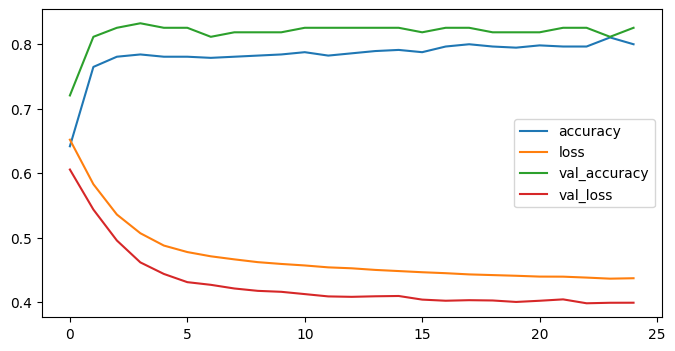

Test accuracy: 0.7932960987091064


In [ ]:
# #leaky_relu` instead of `relu`
# hist = mlp.fit(X_train, y_train, epochs=25, batch_size=32,
#                     validation_split=0.2, verbose=0)
# pd.DataFrame(hist.history).plot(figsize=(8,4)); plt.show()
# print('Test accuracy:', mlp.evaluate(X_test, y_test, verbose=0)[1])

## Part 2 – CNN on MNIST

In [5]:
(X_train_m, y_train_m), (X_test_m, y_test_m) = tf.keras.datasets.mnist.load_data()
X_train_m = X_train_m.astype('float32')/255.
X_test_m = X_test_m.astype('float32')/255.
X_train_m = X_train_m[...,None]
X_test_m = X_test_m[...,None]

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 15s 1us/step


In [6]:
cnn = models.Sequential([
    layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(10,activation='softmax')
])
cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
cnn.summary()

c:\Users\Utilisateur\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
cnn.fit(X_train_m, y_train_m, epochs=5, batch_size=128,
        validation_split=0.1, verbose=2)
print('Test accuracy:', cnn.evaluate(X_test_m, y_test_m, verbose=0)[1])

Epoch 1/5
422/422 - 14s - 34ms/step - accuracy: 0.9386 - loss: 0.2104 - val_accuracy: 0.9820 - val_loss: 0.0680
Epoch 2/5
422/422 - 11s - 27ms/step - accuracy: 0.9817 - loss: 0.0590 - val_accuracy: 0.9887 - val_loss: 0.0423
Epoch 3/5
422/422 - 12s - 27ms/step - accuracy: 0.9863 - loss: 0.0420 - val_accuracy: 0.9882 - val_loss: 0.0405
Epoch 4/5
422/422 - 11s - 26ms/step - accuracy: 0.9902 - loss: 0.0305 - val_accuracy: 0.9890 - val_loss: 0.0421
Epoch 5/5
422/422 - 11s - 26ms/step - accuracy: 0.9924 - loss: 0.0241 - val_accuracy: 0.9900 - val_loss: 0.0351
Test accuracy: 0.9889000058174133


## Part 3 – RNNs for Time Series

We'll forecast a sine wave using previous 50 time‑steps.

In [8]:
t = np.linspace(0, 100, 10000)
series = np.sin(t)
window=50
X_seq, y_seq = [], []
for i in range(len(series)-window):
    X_seq.append(series[i:i+window])
    y_seq.append(series[i+window])
X_seq, y_seq = np.array(X_seq)[...,None], np.array(y_seq)
split=int(0.8*len(X_seq))
X_train_s, X_test_s = X_seq[:split], X_seq[split:]
y_train_s, y_test_s = y_seq[:split], y_seq[split:]
print(X_train_s.shape)

(7960, 50, 1)


### Simple RNN

In [30]:
rnn = models.Sequential([layers.SimpleRNN(32, input_shape=(window,1)),
                        layers.Dense(1)] )
rnn.compile(optimizer='adam', loss='mse')
rnn.summary()
rnn.fit(X_train_s, y_train_s, epochs=5, batch_size=128, validation_split=0.1, verbose=2)
print('RNN Test MSE:', rnn.evaluate(X_test_s, y_test_s, verbose=0))

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_2 (SimpleRNN)        │ (None, 32)             │         1,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,121 (4.38 KB)

 Trainable params: 1,121 (4.38 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
56/56 - 3s - 51ms/step - loss: 0.0042 - val_loss: 1.5857e-04
Epoch 2/5
56/56 - 0s - 8ms/step - loss: 6.5636e-05 - val_loss: 3.1589e-05
Epoch 3/5
56/56 - 1s - 9ms/step - loss: 2.5240e-05 - val_loss: 1.9773e-05
Epoch 4/5
56/56 - 0s - 8ms/step - loss: 1.7724e-05 - val_loss: 1.5191e-05
Epoch 5/5
56/56 - 0s - 9ms/step - loss: 1.3399e-05 - val_loss: 1.1471e-05
RNN Test MSE: 1.122884623327991e-05


### LSTM

In [10]:
lstm = models.Sequential([layers.LSTM(64, input_shape=(window,1)),
                         layers.Dense(1)])
lstm.compile(optimizer='adam', loss='mse')
lstm.summary()
lstm.fit(X_train_s, y_train_s, epochs=5, batch_size=128, validation_split=0.1, verbose=2)
print('LSTM Test MSE:', lstm.evaluate(X_test_s, y_test_s, verbose=0))

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 64)             │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,961 (66.25 KB)

 Trainable params: 16,961 (66.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
56/56 - 5s - 94ms/step - loss: 0.0876 - val_loss: 0.0034
Epoch 2/5
56/56 - 2s - 39ms/step - loss: 0.0022 - val_loss: 0.0015
Epoch 3/5
56/56 - 2s - 39ms/step - loss: 0.0012 - val_loss: 6.3866e-04
Epoch 4/5
56/56 - 2s - 39ms/step - loss: 2.9411e-04 - val_loss: 3.8420e-05
Epoch 5/5
56/56 - 2s - 39ms/step - loss: 2.4385e-05 - val_loss: 1.7018e-05
LSTM Test MSE: 1.6477362805744633e-05


### GRU

In [11]:
gru = models.Sequential([layers.GRU(64, input_shape=(window,1)),
                        layers.Dense(1)])
gru.compile(optimizer='adam', loss='mse')
gru.summary()
gru.fit(X_train_s, y_train_s, epochs=5, batch_size=128, validation_split=0.1, verbose=2)
print('GRU Test MSE:', gru.evaluate(X_test_s, y_test_s, verbose=0))

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru (GRU)                       │ (None, 64)             │        12,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,929 (50.50 KB)

 Trainable params: 12,929 (50.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
56/56 - 6s - 104ms/step - loss: 0.0447 - val_loss: 5.5237e-04
Epoch 2/5
56/56 - 2s - 39ms/step - loss: 4.0936e-04 - val_loss: 3.4173e-04
Epoch 3/5
56/56 - 2s - 38ms/step - loss: 3.2741e-04 - val_loss: 3.0688e-04
Epoch 4/5
56/56 - 2s - 38ms/step - loss: 2.9863e-04 - val_loss: 2.7271e-04
Epoch 5/5
56/56 - 2s - 41ms/step - loss: 2.7379e-04 - val_loss: 2.6288e-04
GRU Test MSE: 0.0002580212021712214


## Visualizing MNIST Data

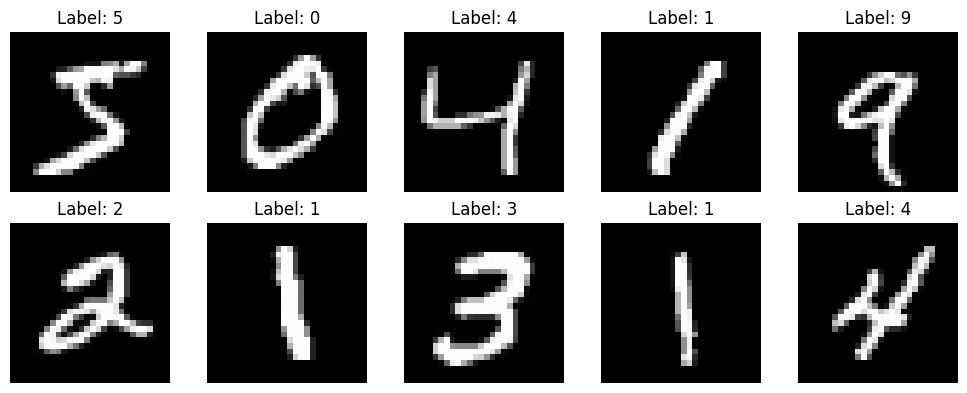

In [16]:
import matplotlib.pyplot as plt
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

fig, axes = plt.subplots(2, 5, figsize=(10, 4))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_train[i], cmap='gray')
    ax.set_title(f"Label: {y_train[i]}")
    ax.axis('off')
plt.tight_layout()
plt.show()

## Visualizing Model Predictions

In [ ]:
def plot_predictions(images, true_labels, pred_labels, num=10):
    import numpy as np
    plt.figure(figsize=(15, 4))
    for i in range(num):
        plt.subplot(2, num//2, i+1)
        plt.imshow(images[i], cmap='gray')
        color = 'green' if true_labels[i] == pred_labels[i] else 'red'
        plt.title(f"T: {true_labels[i]}, P: {pred_labels[i]}", color=color)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

## Exercises

#### 1. Change the Activation Function
Try using `tanh`, `sigmoid`, or `leaky_relu` instead of `relu`. How does it affect training?

 - en changeant les fonctions d'activation, on remarque que les accuracy pour `tanh`, `sigmoid`, or `leaky_relu` sont moins grandes que pour `relu`
- impacte la loss pendant le training et la validation

#### 2. Add Dropout
Add `Dropout(0.3)` after dense or convolutional layers. Does it help reduce overfitting?

- à chaque batch 30% des neurones sont mis à zéro (dropout) pour éviter le sur-apprentissage
- il y a une différence sur l'overfitting : l'accuracy en test augmente (on passe de 0.793  à 0.804)


#### 3. Train a CNN on a New Image Dataset
Choose a public dataset: **CIFAR-10**,  and train a CNN model. You can load it using Keras:
```python
from tensorflow.keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
```


In [38]:
from tensorflow.keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train = X_train.astype('float32')/255.
X_test = X_test.astype('float32')/255.
X_train = X_train[...,None]
X_test = X_test[...,None]

cnn = models.Sequential([
    layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(10,activation='softmax')
])
cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
cnn.summary()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 349s 2us/step


c:\Users\Utilisateur\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [39]:
cnn.fit(X_train_m, y_train_m, epochs=5, batch_size=128,
        validation_split=0.1, verbose=2)
print('Test accuracy:', cnn.evaluate(X_test_m, y_test_m, verbose=0)[1])

Epoch 1/5
422/422 - 11s - 27ms/step - accuracy: 0.9215 - loss: 0.7434 - val_accuracy: 0.9742 - val_loss: 0.0910
Epoch 2/5
422/422 - 10s - 23ms/step - accuracy: 0.9813 - loss: 0.0614 - val_accuracy: 0.9825 - val_loss: 0.0673
Epoch 3/5
422/422 - 10s - 23ms/step - accuracy: 0.9878 - loss: 0.0380 - val_accuracy: 0.9842 - val_loss: 0.0598
Epoch 4/5
422/422 - 10s - 24ms/step - accuracy: 0.9916 - loss: 0.0267 - val_accuracy: 0.9847 - val_loss: 0.0636
Epoch 5/5
422/422 - 10s - 23ms/step - accuracy: 0.9925 - loss: 0.0229 - val_accuracy: 0.9868 - val_loss: 0.0533
Test accuracy: 0.9843000173568726



### 4. Train an LSTM for Text Processing
Choose a small text dataset (e.g., IMDB movie reviews from Keras).
👉 Tokenize the data, pad the sequences, and use an `Embedding` + `LSTM` model to classify text.

```python
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

# Load data
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=10000)
X_train = pad_sequences(X_train, maxlen=100)
X_test = pad_sequences(X_test, maxlen=100)
```
👉 Build and train a sequential model using `Embedding` + `LSTM` + `Dense`.

---
 *Tip:* For each dataset, remember to normalize inputs, convert labels to one-hot encoding if needed, and evaluate accuracy and loss.


In [ ]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

# Load data
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=10000)
X_train = pad_sequences(X_train, maxlen=100)
X_test = pad_sequences(X_test, maxlen=100)

In [40]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# 1. Charger les données IMDB
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=10000)

# 2. Prétraitement: padding des séquences
maxlen = 100
X_train = pad_sequences(X_train, maxlen=maxlen)
X_test = pad_sequences(X_test, maxlen=maxlen)

# 3. Construire le modèle
model = Sequential([
    Embedding(input_dim=10000, output_dim=128, input_length=maxlen),
    LSTM(64, dropout=0.2, recurrent_dropout=0.2),
    Dense(1, activation='sigmoid')  # pour classification binaire
])

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train,
                    epochs=5,
                    batch_size=64,
                    validation_split=0.2)

test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.3f}, Test Loss: {test_loss:.3f}")


17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 23s 1us/step


c:\Users\Utilisateur\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 34s 91ms/step - accuracy: 0.7046 - loss: 0.5578 - val_accuracy: 0.8402 - val_loss: 0.3707
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 28s 89ms/step - accuracy: 0.8749 - loss: 0.3190 - val_accuracy: 0.8256 - val_loss: 0.4002
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 27s 88ms/step - accuracy: 0.9011 - loss: 0.2617 - val_accuracy: 0.8330 - val_loss: 0.4095
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 27s 87ms/step - accuracy: 0.9113 - loss: 0.2303 - val_accuracy: 0.8176 - val_loss: 0.4130
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 28s 88ms/step - accuracy: 0.9311 - loss: 0.1867 - val_accuracy: 0.8218 - val_loss: 0.4556
782/782 ━━━━━━━━━━━━━━━━━━━━ 15s 19ms/step - accuracy: 0.8194 - loss: 0.4610
Test Accuracy: 0.821, Test Loss: 0.452


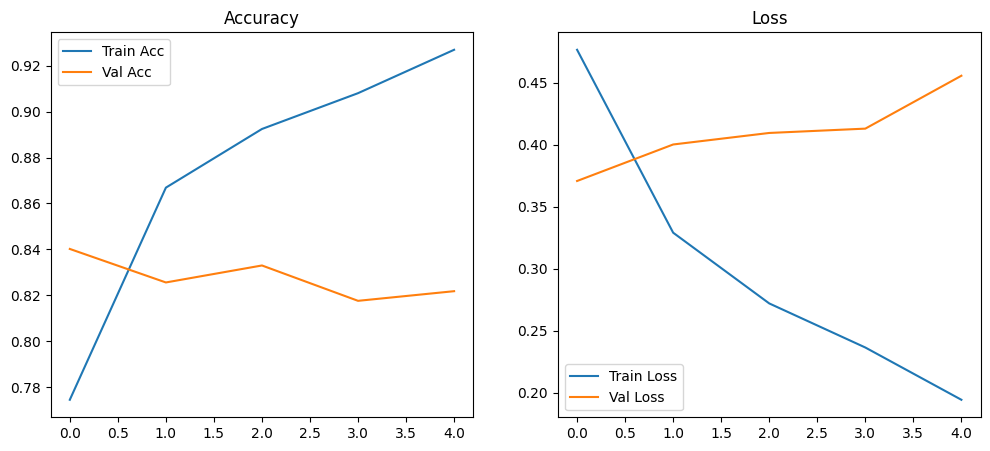

In [41]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title("Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Loss")
plt.legend()
plt.show()
